In [25]:
# HDBSCAN Clustering with UMAP
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import umap
import hdbscan

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Load visual features
def load_visual_features(jsonl_path):
    features = []
    image_names = []
    
    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            features.append(data['embedding'])
            image_names.append(data['image_name'])
    
    return np.array(features), image_names

# Load data
features, image_names = load_visual_features('../output/features/visual_features.jsonl')
print(f"Loaded {len(features)} images with {features.shape[1]}D features")

Loaded 274 images with 768D features


Running UMAP dimensionality reduction...


e:\Projects\ad-digital-analysis\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reduced from 768D to 2D


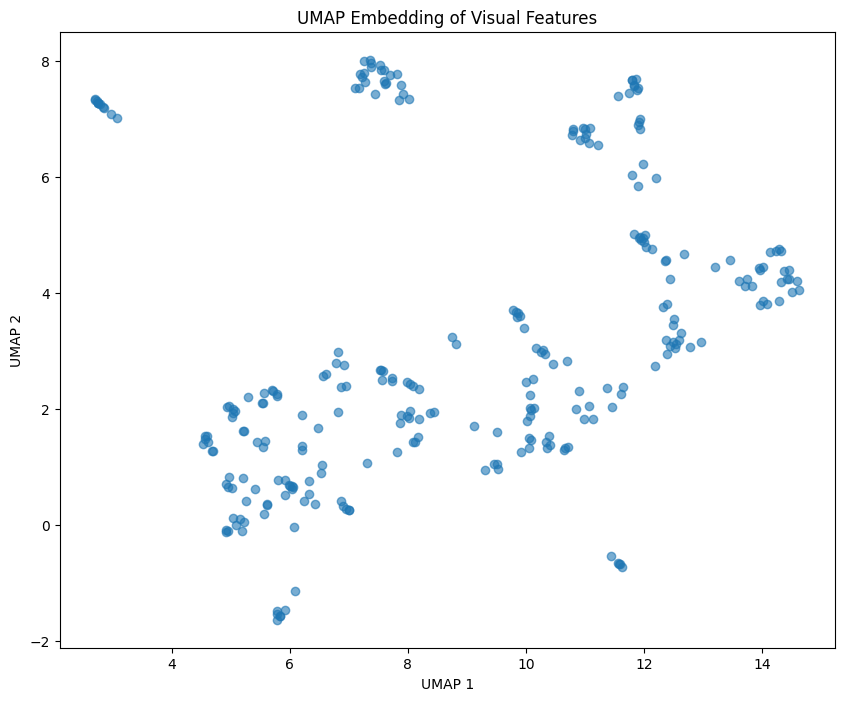

In [19]:
# UMAP dimensionality reduction - optimized for ~270 samples
print("Running UMAP dimensionality reduction...")
reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=10,
    min_dist=0.1,
    metric='euclidean'
)
features_2d = reducer.fit_transform(features)

print(f"Reduced from {features.shape[1]}D to {features_2d.shape[1]}D")

# Plot UMAP embedding
plt.figure(figsize=(10, 8))
plt.scatter(features_2d[:, 0], features_2d[:, 1], alpha=0.6)
plt.title('UMAP Embedding of Visual Features')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [40]:
# HDBSCAN clustering
print("Running HDBSCAN clustering...")

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=8,
    min_samples=5,
    metric='euclidean',
    cluster_selection_method='eom',
    cluster_selection_epsilon=0.1,
    algorithm='best'
)

cluster_labels = clusterer.fit_predict(features_2d)

# Analyze results
unique_clusters = np.unique(cluster_labels)
n_clusters = len(unique_clusters[unique_clusters != -1])
n_noise = np.sum(cluster_labels == -1)

print(f"\nHDBSCAN Results:")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Total images: {len(image_names)}")

# Cluster sizes
from collections import Counter
cluster_sizes = Counter(cluster_labels)
print(f"\nCluster sizes:")
for cluster_id, size in sorted(cluster_sizes.items()):
    if cluster_id != -1:
        print(f"  Cluster {cluster_id}: {size} images")
    else:
        print(f"  Noise: {size} images")

Running HDBSCAN clustering...

HDBSCAN Results:
Number of clusters: 12
Number of noise points: 51
Total images: 274

Cluster sizes:
  Noise: 51 images
  Cluster 0: 11 images
  Cluster 1: 23 images
  Cluster 2: 14 images
  Cluster 3: 11 images
  Cluster 4: 30 images
  Cluster 5: 24 images
  Cluster 6: 12 images
  Cluster 7: 14 images
  Cluster 8: 11 images
  Cluster 9: 18 images
  Cluster 10: 16 images
  Cluster 11: 39 images


e:\Projects\ad-digital-analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Projects\ad-digital-analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


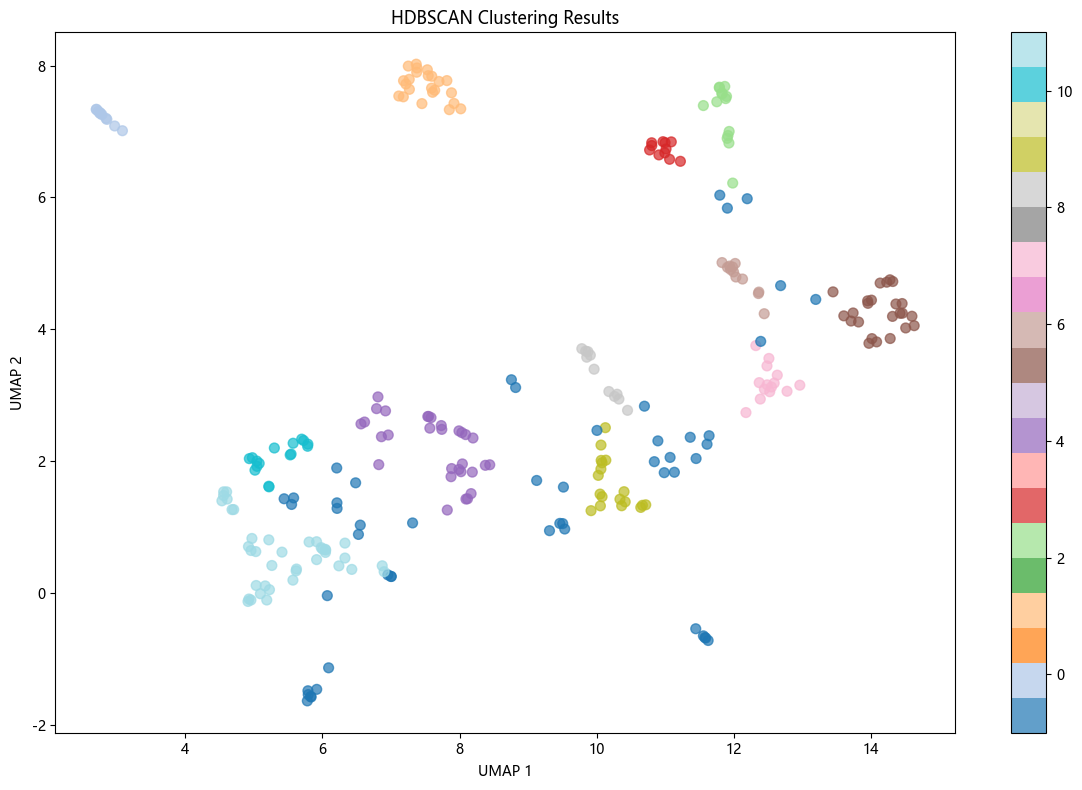

In [41]:
# Visualize HDBSCAN results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], 
                     c=cluster_labels, cmap='tab20', alpha=0.7, s=50)
plt.colorbar(scatter)
plt.title('HDBSCAN Clustering Results')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.tight_layout()
plt.show()


In [28]:
# Show sample images from each cluster
print("Sample images from each cluster:")
for cluster_id in sorted(unique_clusters):
    if cluster_id == -1:
        continue
        
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    sample_indices = cluster_indices[:5]  # Show first 5 images
    
    print(f"\nCluster {cluster_id} ({len(cluster_indices)} images):")
    for idx in sample_indices:
        print(f"  - {image_names[idx]}")


Sample images from each cluster:

Cluster 0 (11 images):
  - 2.27 P14 一夜美容药粉.png
  - 2.28 P9 一夜美容药粉.png
  - 3.12 P17 一夜美容药粉.png
  - 3.16 P19 一夜美容药粉.png
  - 3.22 P15 一夜美容药粉.png

Cluster 1 (23 images):
  - 4.11 P8 镜面散等.png
  - 4.14 P8 镜面散等.png
  - 4.18 P13 镜面散等.png
  - 4.22 P14 镜面散等.png
  - 4.30 P8 镜面散等.png

Cluster 2 (14 images):
  - 1.14 P5 雪白霜.png
  - 1.24 P9 丹杜莲沐浴.png
  - 1.3 P12 镜面散大字.png
  - 1.3 P6 统治霜.png
  - 1.3 P9 美容水.png

Cluster 3 (11 images):
  - 1.21 P9 美而子药蜜.png
  - 2.11 P18 美容奇药.png
  - 2.6 P18 美容奇药.png
  - 3.16 P17 美容奇药.png
  - 4.30 P16 美容奇药.png

Cluster 4 (30 images):
  - 1.10 P16 夏士莲雪花.png
  - 1.14 P7 夏士莲雪花.png
  - 1.17 P9 双叶宝玉霜.png
  - 1.21 P6 双叶宝玉霜.png
  - 1.28 P26 润肤皂.png

Cluster 5 (24 images):
  - 1.24 P15 巴黎雪花膏.png
  - 1.28 P17 镜面散等.png
  - 1.3 P12 镜面散.png
  - 1.7 P18 美容宝钥.png
  - 2.11 P18 美容宝钥.png

Cluster 6 (12 images):
  - 5.10 P16 镜面散等.png
  - 5.10 P6 面麻药水.png
  - 5.22 P6 面麻药水.png
  - 5.24 P8 镜面散等.png
  - 6.10 P10 镜面散等.png

Cluster 7 (14 images):
  - 1.3 P14 美

In [29]:
# Load textual features
def load_textual_features(jsonl_path):
    features = []
    file_names = []
    
    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            features.append(data['embedding'])
            file_names.append(data['file_name'])
    
    return np.array(features), file_names

# Load textual features
text_features, text_file_names = load_textual_features('../output/features/textual_features.jsonl')
print(f"Loaded {len(text_features)} text files with {text_features.shape[1]}D features")


Loaded 269 text files with 1024D features


Running UMAP dimensionality reduction for text features...


e:\Projects\ad-digital-analysis\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text features reduced from 1024D to 2D


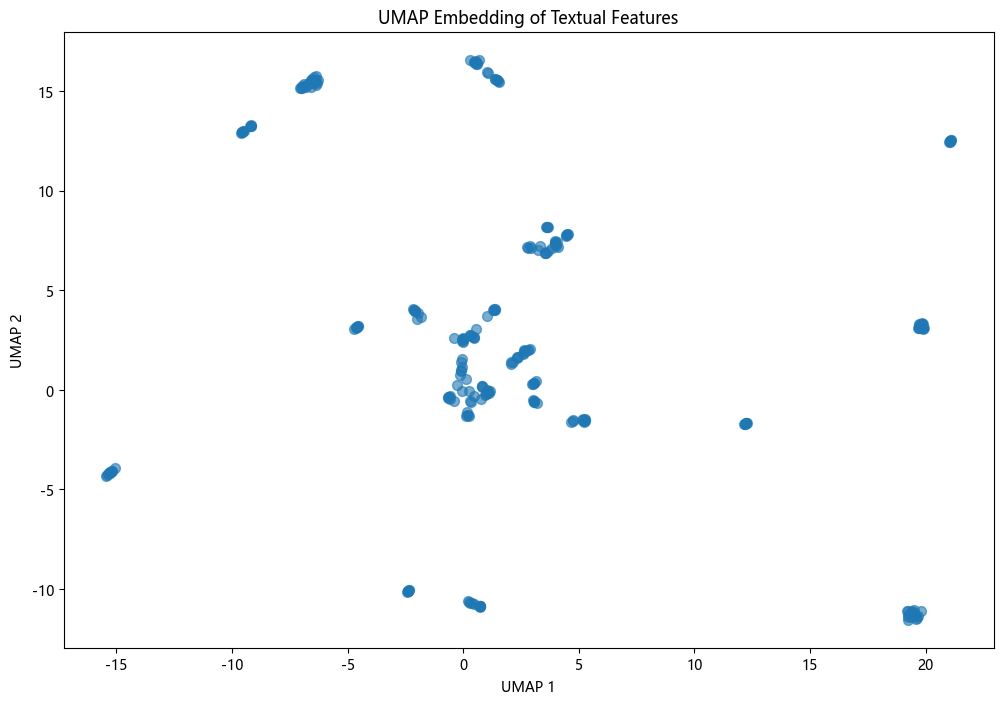

In [34]:
# UMAP dimensionality reduction for text features - optimized for ~270 samples
print("Running UMAP dimensionality reduction for text features...")
text_reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=10,
    min_dist=0.1,
    metric='cosine'
)
text_features_2d = text_reducer.fit_transform(text_features)

print(f"Text features reduced from {text_features.shape[1]}D to {text_features_2d.shape[1]}D")

# Plot UMAP embedding for text
plt.figure(figsize=(12, 8))
plt.scatter(text_features_2d[:, 0], text_features_2d[:, 1], alpha=0.6, s=50)
plt.title('UMAP Embedding of Textual Features')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [43]:
# HDBSCAN clustering on textual UMAP features - reduced cluster count
print("Running HDBSCAN clustering on textual features...")

text_clusterer = hdbscan.HDBSCAN(
    min_cluster_size=12,
    min_samples=6,
    metric='euclidean',
    cluster_selection_method='eom',
    cluster_selection_epsilon=0.1
)

text_cluster_labels = text_clusterer.fit_predict(text_features_2d)

# Analyze text clustering results
text_unique_clusters = np.unique(text_cluster_labels)
text_n_clusters = len(text_unique_clusters[text_unique_clusters != -1])
text_n_noise = np.sum(text_cluster_labels == -1)

print(f"\nText HDBSCAN Results:")
print(f"Number of clusters: {text_n_clusters}")
print(f"Number of noise points: {text_n_noise}")
print(f"Total text files: {len(text_file_names)}")

# Text cluster sizes
text_cluster_sizes = Counter(text_cluster_labels)
print(f"\nText cluster sizes:")
for cluster_id, size in sorted(text_cluster_sizes.items()):
    if cluster_id == -1:
        print(f"  Noise: {size} files")
    else:
        print(f"  Cluster {cluster_id}: {size} files")

Running HDBSCAN clustering on textual features...

Text HDBSCAN Results:
Number of clusters: 10
Number of noise points: 45
Total text files: 269

Text cluster sizes:
  Noise: 45 files
  Cluster 0: 12 files
  Cluster 1: 23 files
  Cluster 2: 18 files
  Cluster 3: 14 files
  Cluster 4: 33 files
  Cluster 5: 19 files
  Cluster 6: 28 files
  Cluster 7: 25 files
  Cluster 8: 15 files
  Cluster 9: 37 files


e:\Projects\ad-digital-analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Projects\ad-digital-analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [44]:
# Show sample images from each cluster
print("Sample images from each cluster:")
for cluster_id in sorted(text_unique_clusters):
    if cluster_id == -1:
        continue
        
    cluster_indices = np.where(text_cluster_labels == cluster_id)[0]
    sample_indices = cluster_indices[:5]  # Show first 5 images
    
    print(f"\nCluster {cluster_id} ({len(cluster_indices)} images):")
    for idx in sample_indices:
        print(f"  - {text_file_names[idx]}")


Sample images from each cluster:

Cluster 0 (12 images):
  - 5.10 P16 镜面散等.txt
  - 5.24 P8 镜面散等.txt
  - 6.10 P10 镜面散等.txt
  - 6.2 P7 镜面散等.txt
  - 6.21 P8 镜面散等.txt

Cluster 1 (23 images):
  - 4.11 P8 镜面散等.txt
  - 4.14 P8 镜面散等.txt
  - 4.18 P13 镜面散等.txt
  - 4.22 P14 镜面散等.txt
  - 4.30 P8 镜面散等.txt

Cluster 2 (18 images):
  - 1.3 P6 统治霜.txt
  - 2.27 P14 一夜美容药粉.txt
  - 2.28 P9 一夜美容药粉.txt
  - 3.12 P17 一夜美容药粉.txt
  - 3.16 P19 一夜美容药粉.txt

Cluster 3 (14 images):
  - 1.7 P18 美容宝钥.txt
  - 2.11 P18 美容宝钥.txt
  - 2.28 P15 美容宝钥.txt
  - 4.11 P12 美容宝钥.txt
  - 5.10 P16 美容宝钥.txt

Cluster 4 (33 images):
  - 1.10 P16 夏士莲雪花.txt
  - 1.14 P7 夏士莲雪花.txt
  - 1.3 P10 夏士莲雪花.txt
  - 1.3 P14 美而子药蜜.txt
  - 2.11 P18 美容奇药.txt

Cluster 5 (19 images):
  - 1.21 P9 美而子药蜜.txt
  - 1.3 P12 老牌预防冻疮药.txt
  - 1.3 P8 预防冻瘃及皮肤开裂.txt
  - 1.3 P9 美容水.txt
  - 1.7 P18 老牌预防冻疮药.txt

Cluster 6 (28 images):
  - 2.27 P8 必素定牙膏.txt
  - 2.6 P12 固龄玉牙膏.txt
  - 3.16 P12 固龄玉牙膏.txt
  - 3.30 P10 海王牙膏.txt
  - 3.30 P14 固龄玉牙膏.txt

Cluster 7 (25 images):
  